<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run).

## Case Study: Fashion Product Catalogue Analysis

This notebook demonstrates how to use VLM Run to analyze fashion product images and extract structured information including:
- Detailed product descriptions
- Product categories
- Target gender
- Seasonal classification

We'll use a sample dataset from the Fashion Product Images dataset to showcase VLM Run's retail product analysis capabilities.

### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.

## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet
! pip install vlmrun-hub --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.0/173.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 20.4 MB/s eta 0:00:00


In [2]:
! pip install datasets --quiet

In [3]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://api.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

··········


Let's initialize the VLM Run Client

In [4]:
from vlmrun.client import VLMRun

vlm_client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)

### Load the dataset

Let's load the first 1% of the fashion dataset, and visualize the dataset.

In [5]:
from datasets import load_dataset


print(f"Loading fashion dataset...")
ds = load_dataset("ashraq/fashion-product-images-small", split=f"train[:10]")
print(f"Loaded {len(ds)} images successfully")
ds

Loading fashion dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/867 [00:00<?, ?B/s]

data/train-00000-of-00002-6cff4c59f91661(…):   0%|          | 0.00/136M [00:00<?, ?B/s]

data/train-00001-of-00002-bb459e5ac5f01e(…):   0%|          | 0.00/135M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

Loaded 10 images successfully


Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 10
})

Let's define an utility function for visualization

In [6]:
import pandas as pd

# Convert the dataset to a pandas dataframe
ds = ds.select_columns(["image", "productDisplayName", "gender", "masterCategory", "season"])
# Decode the image column and convert to PIL image
df = pd.DataFrame([{**row} for row in ds])
df

,image,productDisplayName,gender,masterCategory,season
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Turtle Check Men Navy Blue Shirt,Men,Apparel,Fall
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Peter England Men Party Blue Jeans,Men,Apparel,Summer
2,<PIL.Image.Image image mode=L size=60x80 at 0x...,Titan Women Silver Watch,Women,Accessories,Winter
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Manchester United Men Solid Black Track Pants,Men,Apparel,Fall
4,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Grey T-shirt,Men,Apparel,Summer
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Inkfruit Mens Chain Reaction T-shirt,Men,Apparel,Summer
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Fabindia Men Striped Green Shirt,Men,Apparel,Summer
7,<PIL.Image.Image image mode=RGB size=60x80 at ...,Jealous 21 Women Purple Shirt,Women,Apparel,Summer
8,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Pack of 3 Socks,Men,Accessories,Summer
9,<PIL.Image.Image image mode=RGB size=60x80 at ...,Skagen Men Black Watch,Men,Accessories,Winter


### Image -> JSON with VLM Run


Now, let's call the VLM Run API to get the predictions for the dataframe using the `vlm_client.image.generate` method. In this example, we'll use the `retail.product-catalog` domain to get the predictions.

In [7]:
# Define a function to get predictions for an image from the VLM Run API
def get_predictions(image):
    """Generate predictions for an image using the VLM Run API."""
    try:
        response = vlm_client.image.generate(
            images=[image],
            domain="retail.product-catalog"
        )
        return response.response
    except Exception as e:
        print(f"Error getting predictions for image: {e}")
        return None

# Apply the get_predictions function to the dataframe
df_response = df.assign(
    response=df["image"].apply(lambda image: get_predictions(image))
)
df_response

,image,productDisplayName,gender,masterCategory,season,response
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Turtle Check Men Navy Blue Shirt,Men,Apparel,Fall,{'description': 'A man models a short-sleeved ...
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Peter England Men Party Blue Jeans,Men,Apparel,Summer,{'description': 'A pair of classic blue denim ...
2,<PIL.Image.Image image mode=L size=60x80 at 0x...,Titan Women Silver Watch,Women,Accessories,Winter,{'description': 'This is an elegant silver-ton...
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Manchester United Men Solid Black Track Pants,Men,Apparel,Fall,"{'description': 'A pair of black track pants, ..."
4,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Grey T-shirt,Men,Apparel,Summer,{'description': 'A man is shown wearing a grey...
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Inkfruit Mens Chain Reaction T-shirt,Men,Apparel,Summer,{'description': 'A man models a light grey sho...
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Fabindia Men Striped Green Shirt,Men,Apparel,Summer,{'description': 'A man is wearing a solid oliv...
7,<PIL.Image.Image image mode=RGB size=60x80 at ...,Jealous 21 Women Purple Shirt,Women,Apparel,Summer,{'description': 'A woman models a short-sleeve...
8,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Pack of 3 Socks,Men,Accessories,Summer,{'description': 'The image features a neatly f...
9,<PIL.Image.Image image mode=RGB size=60x80 at ...,Skagen Men Black Watch,Men,Accessories,Winter,"{'description': 'The image displays a sleek, a..."


In [9]:
# Let's explode the response column into a dataframe and display the predictions dataframe
pd.set_option("display.max_colwidth", None)
df_response_json = df_response["response"].apply(lambda x: x if x is not None else None)
df_response_json = pd.concat([df_response[["image"]], pd.json_normalize(df_response_json)], axis=1)
df_response_json


,image,description,category,season,gender
0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F021C06F980>,"A man models a short-sleeved plaid shirt with a dark collar, featuring a checked pattern in shades of blue and white. He pairs the shirt with dark wash jeans, suitable for a casual look.",Apparel,summer,men
1,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F021C302720>,"A pair of classic blue denim jeans with a slightly faded wash and straight leg fit, worn by a man. The jeans are made from a durable fabric and appear to be suitable for everyday wear.",apparel,fall,men
2,<PIL.Image.Image image mode=L size=60x80 at 0x7F021C2C2150>,"This is an elegant silver-toned women's watch featuring a round white dial and a delicate mesh strap. It has a minimalist design, making it suitable for both casual and formal wear.",Watch,spring,women
3,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F021C06FA10>,"A pair of black track pants, featuring an orange logo detail on the left leg, is modeled by a male figure. These pants are designed for comfortable athletic or casual wear.",Apparel,fall,men
4,<PIL.Image.Image image mode=RGB size=60x80 at 0x7F021C078770>,A man is shown wearing a grey short-sleeved polo shirt with a collar and a few buttons at the placket. The shirt features a small white logo on the left chest and is paired with dark trousers.,Apparel,summer,men
5,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F021C0781A0>,"A man models a light grey short-sleeved t-shirt with a colorful graphic print on the front. He is smiling and wearing dark pants, presenting a casual look.",Apparel,summer,men
6,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F021C0787D0>,"A man is wearing a solid olive-green, long-sleeved collared shirt. The shirt's sleeves are rolled up to the forearms, and he is also wearing blue jeans.",Apparel,spring,men
7,<PIL.Image.Image image mode=RGB size=60x80 at 0x7F021C079010>,"A woman models a short-sleeved, collared shirt in a deep reddish-purple hue. The top features a v-neckline and appears to be made from a woven fabric, suitable for casual or semi-formal occasions.",Apparel,spring,women
8,<PIL.Image.Image image mode=RGB size=60x80 at 0x7F021C079430>,"The image features a neatly folded stack of three pairs of crew-length socks in varying dark shades including black, navy, and grey. Each sock prominently displays a small, white embroidered PUMA logo near the cuff.",accessories,fall,men
9,<PIL.Image.Image image mode=RGB size=60x80 at 0x7F021C079820>,"The image displays a sleek, all-black wristwatch with a minimalist design. It features a dark dial with subtle hour markers and a matching black strap.",accessories,fall,men


Now, let's define a few utilities for rendering the dataframe with images / tags.

In [10]:
from IPython.display import HTML, display
from vlmrun.common.image import encode_image

style = """
<style>
    .tag {
        padding: 4px 8px;
        border-radius: 4px;
        font-size: 12px;
        background: #f0f0f0;
        color: #666;
        font-weight: 300;
    }
</style>
"""

formatters = {
    "image": lambda x: f"<img src='{encode_image(x, format='JPEG')}' width='100'>",
    "category": lambda x: f"<span class='tag'>{x}</span>",
    "season": lambda x: f"<span class='tag'>{x}</span>",
    "gender": lambda x: f"<span class='tag'>{x}</span>",
}

Display the dataframe with images and VLM Run predictions.

,image,description,category,season,gender
0,,"A man models a short-sleeved plaid shirt with a dark collar, featuring a checked pattern in shades of blue and white. He pairs the shirt with dark wash jeans, suitable for a casual look.",Apparel,summer,men
1,,"A pair of classic blue denim jeans with a slightly faded wash and straight leg fit, worn by a man. The jeans are made from a durable fabric and appear to be suitable for everyday wear.",apparel,fall,men
2,,"This is an elegant silver-toned women's watch featuring a round white dial and a delicate mesh strap. It has a minimalist design, making it suitable for both casual and formal wear.",Watch,spring,women
3,,"A pair of black track pants, featuring an orange logo detail on the left leg, is modeled by a male figure. These pants are designed for comfortable athletic or casual wear.",Apparel,fall,men
4,,A man is shown wearing a grey short-sleeved polo shirt with a collar and a few buttons at the placket. The shirt features a small white logo on the left chest and is paired with dark trousers.,Apparel,summer,men
5,,"A man models a light grey short-sleeved t-shirt with a colorful graphic print on the front. He is smiling and wearing dark pants, presenting a casual look.",Apparel,summer,men
6,,"A man is wearing a solid olive-green, long-sleeved collared shirt. The shirt's sleeves are rolled up to the forearms, and he is also wearing blue jeans.",Apparel,spring,men
7,,"A woman models a short-sleeved, collared shirt in a deep reddish-purple hue. The top features a v-neckline and appears to be made from a woven fabric, suitable for casual or semi-formal occasions.",Apparel,spring,women
8,,"The image features a neatly folded stack of three pairs of crew-length socks in varying dark shades including black, navy, and grey. Each sock prominently displays a small, white embroidered PUMA logo near the cuff.",accessories,fall,men
9,,"The image displays a sleek, all-black wristwatch with a minimalist design. It features a dark dial with subtle hour markers and a matching black strap.",accessories,fall,men

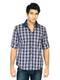
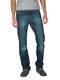
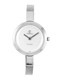
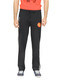
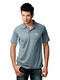
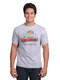
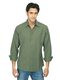
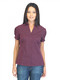
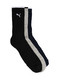
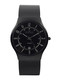

In [11]:
display(HTML(style + df_response_json.to_html(formatters=formatters, escape=False)))

## Additional Resources
- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)
- [Fashion Dataset](https://huggingface.co/datasets/ashraq/fashion-product-images-small)